In [1]:
#Setting------------------------------------------------------------------------
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

import time
import datetime as dt



import pyperclip
from pyperclip import copy
from pyperclip import paste

import expy as ep
import importlib
importlib.reload(ep)

def p(a,b=''):print(b+'>>'+str(a))
    
import sympy as sym
from sympy import init_printing
from sympy import sqrt,sin,cos,tan,exp,log,diff
init_printing()
(a_,b_,c_,d_,e_,
 f_,g_,h_,i_,j_,
 k_,l_,m_,n_,o_,
 p_,q_,r_,s_,t_,
 u_,v_,w_,x_,y_,
 z_) = sym.symbols('a b c d e f g h i j k l m n o p q r s t u v w x y z')
(A_,B_,C_,D_,E_,
 F_,G_,H_,I_,J_,
 K_,L_,M_,N_,O_,
 P_,Q_,R_,S_,T_,
 U_,V_,W_,X_,Y_,
 Z_) = sym.symbols('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z')
oo_,pi_ = sym.oo,sym.pi
lamda_, theta_, gamma_, Omega= sym.symbols('lamda theta gamma Omega')

oo,pi = sym.oo,sym.pi

#from latexfile import LatexFile
#from IPython.core.debugger import Pdb; Pdb().set_trace()

# 0.システム   
|関数名                   |内容                                                     |
|:------------------------|:--------------------------------------------------------|
|to_multi_d( func,data,   |関数を多次元化させる                                     |
|            is_list,     |def func://例                                            |
|            data2=None,  |    def func_unit(d):return **処理**                     |
|            is_none=None)|    func=lambda d:func_unit(d)                           |
|                         |    return to_multi_d(func,data,1)                       |

In [2]:
def to_list(data):
    if type(data) is  type(pd.Series([])): 
        return data.values.tolist()
    if type(data) is  type(pd.DataFrame([])):
        return data.values.tolist()
    if type(data) is  type(np.array([])): 
        return data.tolist()
    else:
        return data
p( to_list(pd.Series([1,2,3])),'Series_to_arr' )
p( to_list(pd.DataFrame([[1,2],[10,20]])),'DFrame_to_arr' )

Series_to_arr>>[1, 2, 3]
DFrame_to_arr>>[[1, 2], [10, 20]]


In [3]:
def to_discrete(arr,method=lambda a,b: b-a,axis=0):
    if type(arr) is type(pd.DataFrame([]))and axis==0: 
        arr=arr.T
    def _to_discrete(arr,method=lambda a,b: b-a):
        arr_rslt=[np.NaN]
        for i in range(len(arr)-1):
            arr_rslt.append(method(arr[i],arr[i+1]))
        return arr_rslt
    arr_in=to_list(arr)
    func=lambda arr:_to_discrete(arr,method)
    return to_multi_d(func,arr_in,1)
arr=pd.DataFrame([[1,2,3,4,5],[10,20,30,40,50]]);display(arr)
to_discrete(arr)

,0,1,2,3,4
0,1,2,3,4,5
1,10,20,30,40,50


NameError: name 'to_multi_d' is not defined

In [ ]:
#多次元化
def to_multi_d(func,data,is_list,data2=None,is_none=None):
    data = to_list(data)
    #p(type(data),"data_type")
    #p(is_list,"is_list")
    def do(to_arr= 0):
        if data is None:
            return is_none
        if to_arr==0 :
            if data2 is None:
                return func(data)
            else:
                return func(data,data2)
        if to_arr==1:
            if data2 is None:
                return func([data])
            else:
                return func([data],[data2]) 
    def repeat():
        #print("repeat-------------------start")
        output=[];
        for i in range(len(data)):
            if data2 is None:
                output.append(to_multi_d(func,data[i],is_list,is_none))
            else:
                output.append(to_multi_d(func,data[i],is_list,data2[i],is_none))
        #print("repeat-------------------end")
        return output
    #1. 入力が数値の場合
    if type(data) is not list:
        if is_list==0: return do()
        if is_list==1: return do(1)
        else:p("not ? but 0")
    #2. 入力が配列の場合
    if type(data) is     list:
        if is_list==0:
            return repeat()
        elif is_list==1:
            if type(data[0]) is not list: return do()
            if type(data[0]) is     list: return repeat() 
        else:p("not ? but 1")
    else:return "??"
test_func1 = lambda num    : [num] * num
test_func2 = lambda array  : len(array)
def multi_test_func1(data):
    return to_multi_d (test_func1,data,0)#data should num
def multi_test_func2(data):
    return to_multi_d (test_func2,data,1)#data should list
    
def test(data):    
    print(str(data))
    p(multi_test_func1(data), '#===multi_test_func_1===#')
    p(multi_test_func2(data), '#===multi_test_func_2===#')
test(1)
test([1,2])
test([[1,2],[3,4]])
test([[[1,2],[3,4]],[[5,6],[7,8]]])

In [ ]:
def matplotlib_setup(name='test.jpg'):#dx,dy):
    #描画設定
    plt.rcParams['font.family'] ='sans-serif'#使用するフォント#元は'IPAPMincho'
    plt.rcParams['mathtext.default'] = 'regular'

    plt.rcParams['xtick.top'] = 'True'
    plt.rcParams['ytick.right'] = 'True'

    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['axes.grid'] = 'True'
    plt.rcParams['axes.xmargin'] = '0' #'.05'
    plt.rcParams['axes.ymargin'] = '.05'
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    #plt.rcParams['savefig.facecolor'] = 'None'
    #plt.rcParams['savefig.edgecolor'] = 'None'
    plt.rcParams['savefig.bbox'] = 'tight'
    plt.rcParams['font.size'] = 8 #フォントの大きさ
    plt.rcParams['xtick.labelsize'] = 8 # 横軸のフォントサイズ
    plt.rcParams['ytick.labelsize'] = 8 # 縦軸のフォントサイズ
    
def begin_plt():#by  
    return plt.figure(figsize=(3.14,3.14))    #3.14 インチは約8cm
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))#y軸小数点以下3桁表示.軸の数値の桁数指定
    plt.gca().xaxis.get_major_formatter().set_useOffset(False)#軸の数字にオフセット(+1.05e9 など)を使わずに表現
    plt.gca().xaxis.get_major_formatter().set_useOffset(False)#軸の数字が整数になるようにする
    plt.locator_params(axis='y',nbins=6)#軸目盛りの個数指定.y軸，6個以内
    plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)#軸目盛りの向きおよび枠のどの位置はありにするかを指定
def end_plt(figname='test.jpg'):
    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.savefig(figname, dpi=600)
    
def mkdf(data,i=0,c=0):
    df = []
    if int(data[0,0]) == 0:
        df =  pd.DataFrame(data[1:,1:],index=data[0,1:],columns=data[1:,0])
    elif i == 1:
        df = pd.DataFrame(data[:,1:],index=data[:,0],columns=None)
    elif c == 1:
        df = pd.DataFrame(data[1:,:],index=None,columns=data[0,:])
    else: print('error')
    return df

In [ ]:
def reshape_to_df(arr,col_num,col=None): 
    ind = []
    data=[]
    for i in range(int(len(arr)/col_num)): 
        n1=i*col_num+1;print(n1)
        n2=(i+1)*col_num
        ind.append(str(n1)+'to'+str(n2));print(ind)
        data.append([arr[n1-1: n2]]);print(data)
    else: 
        n1 = int(len(arr)/col_num)*col_num+1;print(n1)
        n2 = int(len(arr)/col_num+1)*col_num;print(n2)
        ind.append(str(n1)+'to'+str(len(arr)));print(ind)
        data.append([arr[n1-1:]]);print(data)
    return pd.DataFrame(data,ind,col)
reshape_to_df([1,2,3,4,5,6,7,8],3)

# 1.解析


In [ ]:
#mmからcmへ変換
def mm_to_cm(a):func=lambda a:a/10;return to_multi_d(func,a,0)
#cmからmmへ変換
def cm_to_mm(a):func=lambda a:a*10;return to_multi_d(func,a,0)
mm_to_cm(1)

In [ ]:
#関数のすべての変数に値を代入
def subs(func,sym,val):
    for i in range(len(val)):
        func = func.subs([(sym[i],val[i])])
    return func
subs(x_*y_**2*z_**3,[x_,y_,z_],[1,2,3])

In [ ]:
#標準不確かさ計算 
def STDEV(data):
    def STDEV_unit(d):
        #unit
        ave = np.sum(d) / len(d)
        siguma = 0
        for i in range(len(d)):
            siguma += math.pow(d[i] - ave, 2)
        if len(d)<=1:
            return 0
        else:
            output = math.sqrt( siguma / (len(d)-1) )
            return output
    func=lambda d:STDEV_unit(d)
    return to_multi_d(func,data,1)
p(STDEV(0),str(0))
p(STDEV([1,2,3]),str([1,2,3]))
p(STDEV([[4],[5,6],[7,8,9]]),str([[4],[5,6],[7,8,9]]))

In [ ]:
#平均値の不確かさ計算 
def uncrt(data):
    def uncrt_unit (data): 
        output = STDEV(data) / math.sqrt(len(data))
        return output
    func=lambda d:uncrt_unit(d)
    return to_multi_d(func,data,1)
p(uncrt(0),str(0))
p(uncrt([1,2,3]),str([1,2,3]))
p(uncrt([[4],[5,6],[7,8,9]]),str([[4],[5,6],[7,8,9]]))

In [ ]:
#相対不確かさ
def rlt_uncrt(data):
    def rlt_uncrt_unit (data): 
        return uncrt(data) / np.mean(data)
    func=lambda d:rlt_uncrt_unit(d)
    return to_multi_d(func,data,1)
p(rlt_uncrt(0),str(0))
p(rlt_uncrt([1,2,3]),str([1,2,3]))
p(rlt_uncrt([[4],[5,6],[7,8,9]]),str([[4],[5,6],[7,8,9]]))

In [ ]:
def cul(data,p=0):
    def cul_unit(data):
        mean  = np.mean (data)
        uncrt = ep.uncrt(data)
        rslt  = ep.rslt(mean,uncrt)
        rlt   = ep.rlt_uncrt(data)
        #結果まとめ
        cul = [mean, uncrt,rslt,rlt]
        df_cul = pd.DataFrame(cul[2:],index=['rslt','rlt/%',])
        if p==0:return cul
        else:return pd.Series(data).describe().append(df_cul)
    unit=lambda d:cul_unit(d)
    return to_multi_d(unit,data,1)
cul([340.02,340.42,337.83,337.95,337.79,333.94],0)

S_C    =[0]*7      #初期化
S_C[0] =[170]      #mm
S_C[1] =[181,181.5]#mm
S_C[2] =[192,192.5]#mm
S_C[3] =[203,203.5]#mm
S_C[4] =[214,214.5]#mm
S_C[5] =[225,225]  #mm
S_C[6] =[236]      #mm
cul(S_C)

In [ ]:
#二乗和平均
def mean_sq(data):
    def mean_sq_unit(data1,data2):
        import math
        synth = math.sqrt(math.pow(data1,2)+math.pow(data2,2))
        return  synth
    func=lambda d1,d2:mean_sq_unit(d1,d2)
    synth = data[0]
    for i in range(1,len(data)):
        synth = to_multi_d(func,synth,0,data[i])
    return synth
p(mean_sq([3,4]),str([3,4]))
p(mean_sq([[3,5,24,40,60],[4,12,25,41,61]]),str([[3,5,24,40,60],[4,12,25,41,61]]))

In [ ]:
#sympy=>latex（値代入型）
def sym_to_val_to_latex(func,sym_all=[],val_all=[],rm_all=[]):#sym, valは配列
    #初期化
    sym_str = []
    if rm_all==[]:rm_all=['',]*len(sym_all)
    for i in sym_all:
        sym_str.append(sym.Symbol('[]'+str(i)+'[]'));
    func_str = subs(func,sym_all,sym_str)#;print(1,func_str)
    func_str = sym.latex(func_str)       #;print(2,func_str)
    for i in range(len(sym_all)):
        func_str=func_str.replace(str(sym.latex(sym_str[i])),
                                  '('+str(ep.roundup(val_all[i],3))+r'\mathrm{'+rm_all[i]+'}'+')')
    return func_str
print(sym_to_val_to_latex(x_*y_**2*z_**3/f_,[x_,y_,z_,f_],[3,2,1,99],['m','s','g','']))

$\frac{(3.0\mathrm{m}) (2.0\mathrm{s})^{2} (1.0\mathrm{g})^{3}}{(99.0\mathrm{})}$

In [ ]:
#合成不確かさ
def syn_uncrt(func=sym.Symbol('f'),
              uncrt_sym=[],
              uncrt_all=[],
              sym_all=[sym.Symbol('f')],
              val_all=[0],
              rm_all =[],   
              arr=0):
    def syn_uncrt_unit(uncrt_all=[],val_all=[0]):#偏微分用
        #fはlen(uncrt_all)変数関数(いらない数値は代入しておく)
        syn  = 0
        partial_all      = []#各偏微分したSym    ：
        all_sym_to_val   = []#各変数を代入したSym：         ：
        uncrt_unit_all   = []#各計算したInt：1.0
        def uncrt_to_unit_uncrt(u,sym):#不確かさuと対応する変数
            df_dsym = diff(func,sym);
            for i in range(len(sym_all)):
                df_dsym=df_dsym.subs([(sym_all[i],val_all[i])] );
            return u*float(df_dsym)
        for i in range(len(uncrt_all)):
            unit_uncrt= 0
            unit_uncrt_sym = sym.Symbol(r'\Delta '+str(uncrt_sym[i]))**2
            unit_parcial = unit_uncrt_sym
            if uncrt_sym[i] is None:
                syn = mean_sq([syn,uncrt_all[i]])
                unit_uncrt= uncrt_all[i]
            else:
                #print('--in',uncrt_sym[i],'=',uncrt_all[i],'---------------')
                unit_uncrt= uncrt_to_unit_uncrt(uncrt_all[i],uncrt_sym[i])
                unit_parcial = (diff(func,uncrt_sym[i]))**2  
                unit_sym_to_val = sym_to_val_to_latex(unit_parcial,sym_all,val_all,rm_all)+'('+str(uncrt_all[i])+')^{2}'
                unit_parcial = sym.latex(unit_parcial)+sym.latex(unit_uncrt_sym)
                syn = mean_sq([syn,unit_uncrt])
            partial_all.append(unit_parcial)
            uncrt_unit_all.append(unit_uncrt)     
            all_sym_to_val.append(unit_sym_to_val)
        if arr==0:return syn
        else     :return [syn,               #答え（合成不確かさ）
                          partial_all,       #各偏微分したSym
                          all_sym_to_val,    #各変数を代入したStr
                          uncrt_unit_all]    #各計算したInt：1.0
    unit=lambda u,v:syn_uncrt_unit(u,v)
    return to_multi_d(unit,uncrt_all,1,val_all)

#多次元化には対応していないので注意 
theta_,T_ = sym.symbols('theta T')
func_1_10 = 4*pi**2*h_*(1+2*r_**2/(5*h_**2)+theta_/8)/T_**2
display(func_1_10)

syn_uncrt(func_1_10,
          [h_,theta_,r_,T_],
          [1 ,1     ,1 ,1 ],
          [h_,theta_,r_,T_],
          [1 ,1     ,1 ,1 ],
          ['m','rad','m','s'],1)

$\Delta h^2(4pi^2(theta/8 + 1 + 2r^2/(5h^2))/T^2 - 16pi^2r^2/(5T^2h^2))^2$aaaa
aaa$ pi^4\Delta theta^2h^2/(4T^4)$aaa
aaa$256pi^4\Delta r^2r^2/(25T^4h^2)$

In [ ]:
def weighted_mean(mean_all, uncrt_all):
    def weighted_uncrt_unit(mean_all, uncrt_all):
        numer1 = mean_all / np.square(uncrt_all)
        denom1 =     1 / np.square(uncrt_all)
        mean  = np.sum(numer1) / np.sum(denom1)
        denom2 = 1 / np.square(uncrt_all)
        uncrt = 1 / np.sqrt(np.sum(denom2))
        return mean, uncrt
    func=lambda m,u:weighted_uncrt_unit(m,u)
    return to_multi_d(func,mean_all,1,uncrt_all)

weighted_mean([[0,1],[23,45]],[[0.6,0.7],[8,9]])

# 2.表示

In [ ]:
def roundup(x,dig):
    func=lambda x:(math.ceil(x*(10**dig))) / (10**dig)
    return to_multi_d(func,x,0)
p(roundup([[1.11,2.22],3.33],1),str([[[1.11,2.22],3.33],1]))

In [ ]:
def rounder(x,dig):
    func=lambda x:round(x,dig)
    return to_multi_d(func,x,0)
p(rounder([[5.55,5.55],5.55],1),str([[5.55,5.55],5.55])+','+str(1))

In [ ]:
def digitnum(x):
    def digitnum_unit(x):
        y = abs(x)+abs(x)*0.0000000000001
        if y>=1 : return  math.floor(math.log10(y))
        if 1>y>0: return -math.floor(math.log10(1/y)+1)
        if y==0 : return  0
    func=lambda x:digitnum_unit(x)
    return to_multi_d(func,x,is_list=0)
p(digitnum(0),str(0))
p(digitnum([50,[5,0.5],0.05]),str([5,[0.5,0.05],0.005]))

In [ ]:
def rslt(mean,uncrt):
    def roundup(x,dig):return (math.ceil(x*(10**dig))) / (10**dig)
    def rslt_unit(mean,uncrt):
        dig = -digitnum(uncrt)
        return str(round(mean, dig)) + "±" + str(roundup(uncrt,dig))
    func=lambda m,u: rslt_unit(m,u)
    return to_multi_d(func,mean,0,uncrt)
p(rslt(10,1),str(10)+','+str(1))
p(rslt([[1.11,1.11],1.11],[[5,0.5],0.05]),str([[1.11,1.11],1.11])+','+str([[5,0.5],0.05]))

# $\LaTeX{}$

### setting

\frac{x}{y}


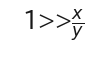

\begin{align*}
\omega_{0}


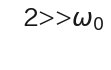

&=\frac{1}{\sqrt{C L}}\\


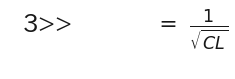

&=\frac{1}{\sqrt{150.54\mathrm{\Omega }\times 4.7\mathrm{nF}}}\\


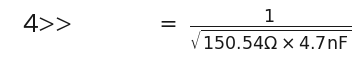

&=1188.8446704135583\mathrm{rad/s}\\


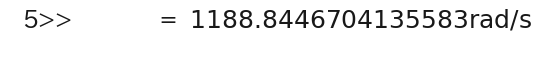

&=1.188\times 10^3\mathrm{rad/s}\\


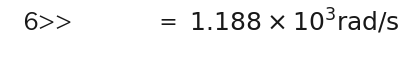

\end{align*}


In [97]:
def print_latex(text):
    latex=text.replace('\t','').split('\n')
    h = len(latex)
    for i in range(len(latex)): 
        t=latex[i];print(t)
        if not('begin'in t or 'end' in t):
            plt.figure(figsize=(1, 0.5))
            if '&=' in t: 
                t=t.replace('&=','').replace('\\\\','')
                plt.text(0,1,str(i+1)+'>>\t\t=  $'+t+r'$',size='25',va='center',alpha=0.9)
            else: 
                plt.text(0,1,str(i+1)+'>>$'+t+r'$',size='25',va='center',alpha=0.9)
            plt.axis('off')
            plt.show()
text = '\\begin{align*}\n\t\\omega_{0}\n\t&=\\frac{1}{\\sqrt{C L}}\\\\\n\t&=\\frac{1}{\\sqrt{150.54\\mathrm{\\Omega }\\times 4.7\\mathrm{nF}}}\\\\\n\t&=1188.8446704135583\\mathrm{rad/s}\\\\\n\t&=1.188\\times 10^3\\mathrm{rad/s}\\\\\n\t\\end{align*}'
print_latex(r'\frac{x}{y}')
print_latex(text)

In [94]:
begin1 = r'\begin{align*}'+'\n'+'\t'#there is x
begin2 = ' &='                         #there is func
newln  = r'\\'+'\n' + '\t\t&='
end1   = r'\mathrm{'                   #there is rm
end2   = r'}\\'+'\n\t'+r'\label{'      #there is label
end3   = '}'+'\n\t'+r'\end{align*}'

In [ ]:
#基本型
def to_latex(s='%%',answer=0, x='%%', rm='%%',p=0,label=''):
    tex = begin1+x+begin2+ s +newln+ str(answer) +end1+rm+end2+label+end3
    print('')
    plt.show()
    if p!=0: print(tex);return tex
    else:     copy(tex);return tex
to_latex('\\frac{1}{10}',0.1,'x','cm',0,'')

In [ ]:
def align_latex(unit=[],label='',p=0,s=''):
    tex=''
    for i in range(len(unit)):
        if i!=0:tex+='='
        tex +=sym.latex(unit[i])
    begin = r'\begin{align}'+'\n\t'
    end   = '\n\t'+'\label{'+label+'}'+'\n\t'+r'\end{align}'
    tex = begin + tex + s + end
    if p!=0: print(tex);return tex
    else:     copy(tex);return tex

In [ ]:
align_latex([a_*a_+b_*b_,c_*c_,25],'a,b,c',0,'(a,b,cは自然数)')

\begin{align}
	a^{2} + b^{2}=c^{2}=25(a,b,cは自然数)
	\label{a,b,c}
	\end{align}

In [ ]:
def align_asta_latex(unit=[],p=0): 
    tex=''
    for i in range(len(unit)):
        if i!=0:tex+='\n\t&='
        tex +=sym.latex(unit[i])
        if i!=0:tex+=r'\\'
    tex = r'\begin{align*}'+'\n\t'+tex+'\n\t'+r'\end{align*}'
    if p!=0: print(tex);return tex
    else:     copy(tex);return    

In [ ]:
R_L_,omega_1_,omega_2_,f_0_,f_1_,Omega_= sym.symbols('R_L,omega_1,omega_2,f_0 f_1 Omega_')

align_asta_latex([gamma_,(R_+R_L_+50*Omega_)/(2* L_),
                 r'\frac{130.37\cdot \Omega +68.15+\Omega +50\Omega }{2\cdot 72.34}',
                 '1717.7rad/s',
                 '1.718* 10^3'],0)

\begin{align*}
	\gamma
	&=\frac{50 \Omega_{} + R + R_{L}}{2 L}\\
	&=\frac{130.37\cdot \Omega +68.15+\Omega +50\Omega }{2\cdot 72.34}\\
	&=1717.7rad/s\\
	&=1.718* 10^3\\
	\end{align*}

In [ ]:
#分数型
def frac_to_latex(denom,numer, answer=0, x='%%', rm='%%',p=0,label=''):
    return to_latex(r'\frac{'+denom+'}{'+numer+'}', answer, x,rm,p,label)
frac_to_latex('1','10', 0.1, 'x', 'cm',1)

\begin{eqnarray*}
	x&=&\frac{1}{10}\\
		&=&0.1\mathrm{cm}\\
\end{eqnarray*}

In [ ]:
def mean_to_latex(data, x='%%', rm='%%',p=0,label=''):
    denom =  ''
    for i in range(len(data)):
        if i != 0:denom=denom+'+'
        denom += str(data[i])+rm
    #LaTeX作成
    return frac_to_latex(denom,str(len(data)), np.mean(data), x, rm,p,label)
data = np.random.rand(10)
data =rounder(data,1)
mean_to_latex(data,'x','cm',1)

\begin{eqnarray*}
	x&=&\frac{0.0cm+0.2cm+0.2cm+0.3cm+0.6cm+0.3cm+0.1cm+0.2cm+0.5cm+0.9cm}{10}\\
		&=&0.32999999999999996\mathrm{cm}\\
\end{eqnarray*}

In [ ]:
def uncrt_to_latex(data, x='%%', rm='%%',p=0,label=''):
    N=len(data);m=np.mean(data);u=uncrt(data)
    #LaTeX作成
    s = r'\sqrt{\frac{1}{'+str(N)+r'\cdot'+str(N-1)+r'}\sum_{i=1}^'+str(N)+'('+x+'_i-'+str(m)+')^2}'
    return to_latex(s, uncrt(data), 'Δ'+x,rm,p,label)

In [ ]:
def weighted_mean_to_latex(mean_all, uncrt_all, x='%%', rm='%%',p=0,label=''):
    denom = ''#分子
    numer = ''#分母
    for i in range(len(mean_all)):
        denom += r'\frac{'+str(mean_all[i])+'}{('+str(uncrt_all[i])+')^2}'
        numer += r'\frac{1}{('+str(uncrt_all[i])+')^2}' 
        if i != len(mean_all)-1: 
            denom += '+'
            numer += '+'
    #LaTeX作成
    return frac_to_latex(denom,numer,weighted_mean(mean_all,uncrt_all),x,rm,p,label)

In [ ]:
def mean_sq_to_latex(data, x='%%', rm='%%',p=0,label=''):
    denom =  ''
    for i in range(len(data)):
        if i != 0:denom=denom+'+'
        denom+= '('+str(data[i])+')^{2}'
    #LaTeX作成
    return to_latex(r'\sqrt{'+denom+'}', mean_sq(data), x, rm,p,label)
data = np.random.rand(10)
data =rounder(data,3)
mean_sq_to_latex(data,'x','cm',0)

\begin{eqnarray*}
	x&=&\sqrt{(0.117)^{2}+(0.647)^{2}+(0.957)^{2}+(0.764)^{2}+(0.949)^{2}+(0.183)^{2}+(0.505)^{2}+(0.535)^{2}+(0.885)^{2}+(0.66)^{2}}\\
		&=&2.150815659232562\mathrm{cm}\\
\end{eqnarray*}

In [ ]:
def syn_uncrt_to_latex(func=sym.Symbol('f'),
                       uncrt_sym=[],
                       uncrt_all=[],
                       sym_all=[sym.Symbol('f')],
                       uncrt_unit_all=[0],
                       rm_all =[],
                       x='%%',rm='%%',p=0,label=''):
    ans,partial_all,all_sym_to_val,uncrt_unit_all = syn_uncrt(func,uncrt_sym,uncrt_all,
                                                                      sym_all,uncrt_unit_all,rm_all,1)
    print([partial_all,'<<<>>>',all_sym_to_val,'<<<>>>',uncrt_unit_all])
    func1 = ''#各偏微分しそうな二乗和平均
    func2 = ''#各偏微分した二乗和平均
    func3 = ''#各変数を代入した二乗和平均
    func4 = ''#各計算したInt二乗和平均
    for i in range(len(uncrt_all)):
        if i!=0:func1=func1+'+';func2=func2+'+';func3=func3+'+';func4=func4+'+'
        diff_denom=sym.Symbol(r'\partial '+x)
        diff_numor=sym.Symbol(r'\partial '+str(uncrt_sym[i]))
        func1 = func1 + '('+sym.latex(diff_denom/diff_numor)+')^{2}'+r'\Delta '+str(uncrt_sym[i])+'^2'
        func2 = func2 + partial_all[i]
        func3 = func3 + all_sym_to_val[i]
        func4 = func4 + '('+str(uncrt_unit_all[i])+')^{2}'
    else:
        func1 = r'\sqrt{'+func1+'}'
        func2 = r'\sqrt{'+func2+'}'
        func3 = r'\sqrt{'+func3+'}'
        func4 = r'\sqrt{'+func4+'}'
    #for i in range(len(uncrt_unit_all)):
    return to_latex(func1+'\n'+r'\\'+'\n\t&='+func2+'\n'+r'\\'+'\n\t&='+func3+'\n'+r'\\'+'\n\t&='+func4,ans,r'\Delta '+x,rm,p,label)
    
S_S_0        = sym.Symbol(r'(S-S_0)');func_6_6    = g_*l_*l_*l_*d_*m_/(2*a_*a_*a_*b_*r_*S_S_0)
display(func_6_6)
print(syn_uncrt_to_latex(func_6_6,
                   [d_,g_,m_],
                   [6,8,0],
                   [d_,g_,l_,m_,S_S_0,a_,b_,r_],
                   [1 ,1 ,1, 1, 1    ,1 ,1 ,1 ],
                   ['d','g','l','m','s','a','b','r'],
                   'E','Pa',0))

\begin{align*}
	\Delta E &=\sqrt{(\frac{\partial E}{\partial d})^{2}\Delta d^2+(\frac{\partial E}{\partial g})^{2}\Delta g^2+(\frac{\partial E}{\partial m})^{2}\Delta m^2}
\\
	&=\sqrt{\frac{g^{2} l^{6} m^{2}}{4 (S-S_{0)}^{2} a^{6} b^{2} r^{2}}\Delta d^{2}+\frac{d^{2} l^{6} m^{2}}{4 (S-S_{0)}^{2} a^{6} b^{2} r^{2}}\Delta g^{2}+\frac{d^{2} g^{2} l^{6}}{4 (S-S_{0)}^{2} a^{6} b^{2} r^{2}}\Delta m^{2}}
\\
	&=\sqrt{\frac{(1.0\mathrm{g})^{2} (1.0\mathrm{l})^{6} (1.0\mathrm{m})^{2}}{4 (1.0\mathrm{s})^{2} (1.0\mathrm{a})^{6} (1.0\mathrm{b})^{2} (1.0\mathrm{r})^{2}}(6)^{2}+\frac{(1.0\mathrm{d})^{2} (1.0\mathrm{l})^{6} (1.0\mathrm{m})^{2}}{4 (1.0\mathrm{s})^{2} (1.0\mathrm{a})^{6} (1.0\mathrm{b})^{2} (1.0\mathrm{r})^{2}}(8)^{2}+\frac{(1.0\mathrm{d})^{2} (1.0\mathrm{g})^{2} (1.0\mathrm{l})^{6}}{4 (1.0\mathrm{s})^{2} (1.0\mathrm{a})^{6} (1.0\mathrm{b})^{2} (1.0\mathrm{r})^{2}}(0)^{2}}
\\
	&=\sqrt{(3.0)^{2}+(4.0)^{2}+(0.0)^{2}}\\
		&=5.0\mathrm{Pa}\\
	\label{}
	\end{align*}

\begin{eqnarray*}
	\Delta E&=&\sqrt{(\frac{\partial E}{\partial d})^{2}\partial d+(\frac{\partial E}{\partial g})^{2}\partial g+(\frac{\partial E}{\partial m})^{2}\partial m}
	&=&\sqrt{\frac{g^{2} l^{6} m^{2}}{4 (S-S_{0)}^{2} a^{6} b^{2} r^{2}}\Delta d^{2}+\frac{d^{2} l^{6} m^{2}}{4 (S-S_{0)}^{2} a^{6} b^{2} r^{2}}\Delta g^{2}+\frac{d^{2} g^{2} l^{6}}{4 (S-S_{0)}^{2} a^{6} b^{2} r^{2}}\Delta m^{2}}
	&=&\sqrt{\frac{(1.0\mathrm{g})^{2} (1.0\mathrm{l})^{6} (1.0\mathrm{m})^{2}}{4 (1.0\mathrm{s})^{2} (1.0\mathrm{a})^{6} (1.0\mathrm{b})^{2} (1.0\mathrm{r})^{2}}(6)^{2}+\frac{(1.0\mathrm{d})^{2} (1.0\mathrm{l})^{6} (1.0\mathrm{m})^{2}}{4 (1.0\mathrm{s})^{2} (1.0\mathrm{a})^{6} (1.0\mathrm{b})^{2} (1.0\mathrm{r})^{2}}(8)^{2}+\frac{(1.0\mathrm{d})^{2} (1.0\mathrm{g})^{2} (1.0\mathrm{l})^{6}}{4 (1.0\mathrm{s})^{2} (1.0\mathrm{a})^{6} (1.0\mathrm{b})^{2} (1.0\mathrm{r})^{2}}(0)^{2}}
	&=&\sqrt{(3.0)^{2}+(4.0)^{2}+(0.0)^{2}}\\
		&=&5.0\mathrm{Pa}\\
	\label{}
\end{eqnarray*}